In [248]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Set Matplotlib to interactive mode
plt.ion()

# Define the custom color mapping dictionary
color_map = {
    'A+': 'green', 'A': 'green', 'A-': 'green',
    'B+': 'blue', 'B': 'blue', 'B-': 'blue',
    'C+': 'orange', 'C': 'orange', 'C-': 'orange',
    'D+': 'red', 'D': 'red', 'D-': 'red',
    'F': 'black'
}

st.title('HackUTA 2023')

csv_options = ['Fall 2022', 'Fall 2021', 'Fall 2020', 'Fall 2019', 'Fall 2018', 'Fall 2017']
# csv = st.selectbox('Select a semester', csv_options)



In [249]:
df_2022 = pd.read_csv('/Users/amitkulkarni/Documents/GradeDistribution/csv/' + csv_options[0] + '.csv')
df_2021 = pd.read_csv('/Users/amitkulkarni/Documents/GradeDistribution/csv/' + csv_options[1] + '.csv')
df_2020 = pd.read_csv('/Users/amitkulkarni/Documents/GradeDistribution/csv/' + csv_options[2] + '.csv')
df_2019 = pd.read_csv('/Users/amitkulkarni/Documents/GradeDistribution/csv/' + csv_options[3] + '.csv')
df_2018 = pd.read_csv('/Users/amitkulkarni/Documents/GradeDistribution/csv/' + csv_options[4] + '.csv')
df_2017 = pd.read_csv('/Users/amitkulkarni/Documents/GradeDistribution/csv/' + csv_options[5] + '.csv')

# do the same for all other dataframes
def preprocess_dataframe(df):
    df['course'] = df['Subject'] + ' ' + df['Catalog Number']
    df = df[['course', 'Section', 'A', 'A-', 'A+', 'B', 'B-', 'B+', 'C', 'C-', 'C+', 'D', 'D-', 'D+', 'F']]
    df = df.set_index('course')
    return df

df_2022 = preprocess_dataframe(df_2022)
df_2021 = preprocess_dataframe(df_2021)
df_2020 = preprocess_dataframe(df_2020)
df_2019 = preprocess_dataframe(df_2019)
df_2018 = preprocess_dataframe(df_2018)
df_2017 = preprocess_dataframe(df_2017)

In [250]:
df_2022

,Section,A,A-,A+,B,B-,B+,C,C-,C+,D,D-,D+,F
course,,,,,,,,,,,,,,
ACCT 2301,001,7.0,3.0,17.0,7.0,3.0,14.0,4.0,1.0,2.0,NaN,NaN,1.0,1.0
ACCT 2301,002,7.0,5.0,10.0,4.0,4.0,6.0,1.0,7.0,4.0,NaN,NaN,3.0,5.0
ACCT 2301,003,11.0,8.0,8.0,11.0,5.0,4.0,4.0,NaN,4.0,NaN,NaN,NaN,3.0
ACCT 2301,004,10.0,7.0,4.0,5.0,3.0,17.0,4.0,1.0,6.0,NaN,1.0,NaN,1.0
ACCT 2301,005,11.0,4.0,21.0,3.0,3.0,13.0,3.0,1.0,2.0,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPAS 6336,501,6.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
VPAS 6339,501,16.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VPAS 6391,001,9.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [251]:
# for all the same courses, find the average grade distribution
df_2022 = df_2022.groupby('course').mean()
df_2021 = df_2021.groupby('course').mean()
df_2020 = df_2020.groupby('course').mean()
df_2019 = df_2019.groupby('course').mean()
df_2018 = df_2018.groupby('course').mean()
df_2017 = df_2017.groupby('course').mean()

/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_69530/4083412055.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2022 = df_2022.groupby('course').mean()
/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_69530/4083412055.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2021 = df_2021.groupby('course').mean()
/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_69530/4083412055.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only c

In [252]:
df_2022

,A,A-,A+,B,B-,B+,C,C-,C+,D,D-,D+,F
course,,,,,,,,,,,,,
ACCT 2301,7.642857,6.142857,11.000000,6.285714,4.071429,9.000000,6.230769,2.800000,4.142857,1.500000,1.428571,1.571429,2.700000
ACCT 2302,9.166667,4.200000,8.833333,8.833333,4.000000,4.333333,5.333333,2.333333,4.500000,3.333333,1.000000,2.400000,3.333333
ACCT 3312,13.000000,11.000000,11.000000,6.000000,1.000000,6.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
ACCT 3322,11.000000,5.000000,2.000000,12.000000,2.000000,2.000000,4.000000,NaN,2.000000,2.000000,NaN,2.000000,3.000000
ACCT 3331,4.000000,5.500000,10.000000,5.000000,4.250000,6.000000,6.000000,NaN,1.500000,1.000000,1.000000,1.333333,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VPAS 6336,6.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
VPAS 6339,16.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VPAS 6391,9.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [253]:
common_courses = set(df_2022.index) & set(df_2021.index) & set(df_2020.index) & set(df_2019.index) & set(df_2018.index) & set(df_2017.index)

# delete all courses not in common_courses

df_2022 = df_2022.loc[common_courses]
df_2021 = df_2021.loc[common_courses]
df_2020 = df_2020.loc[common_courses]
df_2019 = df_2019.loc[common_courses]
df_2018 = df_2018.loc[common_courses]
df_2017 = df_2017.loc[common_courses]

/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_69530/3383332186.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_2022 = df_2022.loc[common_courses]
/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_69530/3383332186.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_2021 = df_2021.loc[common_courses]
/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_69530/3383332186.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_2020 = df_2020.loc[common_courses]
/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_69530/3383332186.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_2019 = df_2019.loc[common_courses]
/var/folders/15/57t1bd2x675gt0csxrbyk8l00000gn/T/ipykernel_6

In [254]:
df_2022

,A,A-,A+,B,B-,B+,C,C-,C+,D,D-,D+,F
course,,,,,,,,,,,,,
ATCM 3309,8.000000,4.000000,4.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000
PHYS 3330,8.000000,5.000000,3.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.00,NaN,NaN,2.000000
RMIS 4334,1.000000,NaN,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,1.000000,2.000000
ACCT 4301,1.000000,4.000000,1.000000,2.000000,2.000000,3.000000,NaN,2.000000,2.000000,1.00,NaN,2.000000,1.000000
BUAN 6398,17.400000,7.400000,NaN,8.600000,4.200000,10.400000,2.333333,NaN,2.250000,NaN,NaN,NaN,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MUSI 2315,2.000000,2.666667,10.000000,1.000000,2.000000,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,3.000000
MUSI 2317,2.000000,1.500000,12.333333,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
EECT 6326,3.000000,1.000000,NaN,3.000000,4.000000,3.000000,4.000000,NaN,4.000000,NaN,NaN,NaN,NaN


In [255]:
years = [df_2022, df_2021, df_2020, df_2019, df_2018, df_2017]

for df in years:
    df['As'] = df[['A', 'A+', 'A-']].fillna(0).sum(axis=1)
    df['Bs'] = df[['B', 'B+', 'B-']].fillna(0).sum(axis=1)
    df['Cs'] = df[['C', 'C+', 'C-']].fillna(0).sum(axis=1)
    df['Ds'] = df[['D', 'D+', 'D-']].fillna(0).sum(axis=1)
    df['Fs'] = df['F'].fillna(0)

# get percent As, Bs, Cs, Ds, Fs
for df in years:
    sum = df['As'] + df['Bs'] + df['Cs'] + df['Ds'] + df['Fs']
    df['A%'] = round(df['As'] / sum * 100)
    df['B%'] = round(df['Bs'] / sum * 100)
    df['C%'] = round(df['Cs'] / sum * 100)
    df['D%'] = round(df['Ds'] / sum * 100)
    df['F%'] = round(df['Fs'] / sum * 100)

# Now calculate average GPA of each course for each year
for df in years:
    df['GPA'] = (df['As'] * 4 + df['Bs'] * 3 + df['Cs'] * 2 + df['Ds'] * 1 + df['Fs'] * 0) / (df['As'] + df['Bs'] + df['Cs'] + df['Ds'] + df['Fs'])


In [256]:
# sort by course name for each 
for df in years:
    df.sort_index(inplace=True)

In [257]:
df_2022

,A,A-,A+,B,B-,B+,C,C-,C+,D,...,Bs,Cs,Ds,Fs,A%,B%,C%,D%,F%,GPA
course,,,,,,,,,,,,,,,,,,,,,
ACCT 2301,7.642857,6.142857,11.000000,6.285714,4.071429,9.000000,6.230769,2.800000,4.142857,1.500000,...,19.357143,13.173626,4.500000,2.700000,38.0,30.0,20.0,7.0,4.0,2.914938
ACCT 2302,9.166667,4.200000,8.833333,8.833333,4.000000,4.333333,5.333333,2.333333,4.500000,3.333333,...,17.166667,12.166667,6.733333,3.333333,36.0,28.0,20.0,11.0,5.0,2.781926
ACCT 3331,4.000000,5.500000,10.000000,5.000000,4.250000,6.000000,6.000000,NaN,1.500000,1.000000,...,15.250000,7.500000,3.333333,2.000000,41.0,32.0,16.0,7.0,4.0,2.985989
ACCT 3332,6.666667,4.000000,3.333333,7.333333,1.666667,2.333333,7.333333,3.500000,2.666667,4.333333,...,11.333333,13.500000,11.000000,2.666667,27.0,22.0,26.0,21.0,5.0,2.438095
ACCT 3341,5.000000,2.500000,2.500000,5.500000,1.500000,3.500000,5.000000,2.500000,3.000000,2.000000,...,10.500000,10.500000,3.000000,2.500000,27.0,29.0,29.0,8.0,7.0,2.616438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STAT 6348,6.000000,NaN,NaN,2.000000,3.000000,1.000000,6.000000,NaN,2.000000,NaN,...,6.000000,8.000000,0.000000,1.000000,29.0,29.0,38.0,0.0,5.0,2.761905
SYSM 6301,16.000000,1.000000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,...,4.000000,0.000000,0.000000,0.000000,81.0,19.0,0.0,0.0,0.0,3.809524
THEA 1310,26.000000,5.666667,27.500000,7.000000,1.000000,6.000000,1.333333,1.500000,1.500000,1.000000,...,14.000000,4.333333,2.000000,1.333333,73.0,17.0,5.0,2.0,2.0,3.579381


In [258]:
# course = 'ACCT 2301'
# # Section is all the sections under the course


# gpa_2022 = df_2022.loc[course][Section]['GPA']
# gpa_2021 = df_2021.loc[course][Section]['GPA']
# gpa_2020 = df_2020.loc[course][Section]['GPA']
# gpa_2019 = df_2019.loc[course][Section]['GPA']
# gpa_2018 = df_2018.loc[course][Section]['GPA']
# gpa_2017 = df_2017.loc[course][Section]['GPA']

# plt.plot([2022, 2021, 2020, 2019, 2018, 2017], [gpa_2022, gpa_2021, gpa_2020, gpa_2019, gpa_2018, gpa_2017])
# plt.xlabel('Year')
# # change yscale to 4.0 to 0.0
# plt.ylim(0.0, 4.0)
# plt.ylabel('GPA')
# plt.title('GPA for ' + course)
# plt.show()



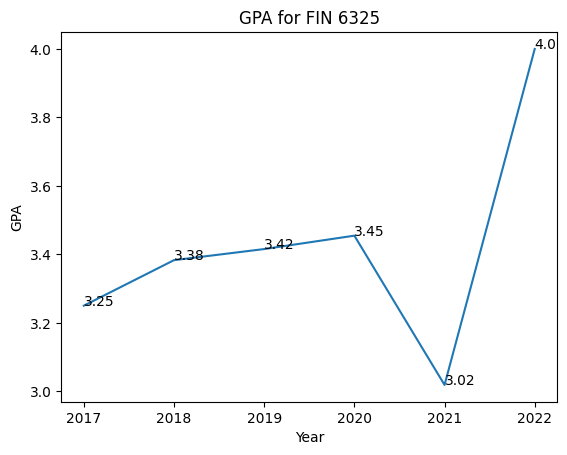

In [262]:
# plot the year as x-axis and GPA as y-axis with a line plot. get the GPA for ACCT 2301 for years 2017, 2018, 2019, 2020, 2021, 2022 and plot it
course = 'FIN 6325'
gpa_2022 = df_2022.loc[course]['GPA']
gpa_2021 = df_2021.loc[course]['GPA']
gpa_2020 = df_2020.loc[course]['GPA']
gpa_2019 = df_2019.loc[course]['GPA']
gpa_2018 = df_2018.loc[course]['GPA']
gpa_2017 = df_2017.loc[course]['GPA']

plt.plot([2022, 2021, 2020, 2019, 2018, 2017], [gpa_2022, gpa_2021, gpa_2020, gpa_2019, gpa_2018, gpa_2017])
# show values on each point rounded to 2 decimal places
for x, y in zip([2022, 2021, 2020, 2019, 2018, 2017], [gpa_2022, gpa_2021, gpa_2020, gpa_2019, gpa_2018, gpa_2017]):
    plt.text(x, y, str(round(y, 2)))
plt.xlabel('Year')
# change yscale to 4.0 to 0.0
plt.ylabel('GPA')
plt.title('GPA for ' + course)
plt.show()

In [260]:
# # print all the courses which are common in all the dataframes
# common_courses = set(df_2022.index) & set(df_2021.index) & set(df_2020.index) & set(df_2019.index) & set(df_2018.index) & set(df_2017.index)
# # print (common_courses) in alphabetical order
# common_courses = list(common_courses)
# common_courses.sort()
# print(common_courses)

In [261]:

# add a dropdown with all the courses
course = st.selectbox('Select a course', df.index)

# Streamlit plot for the selected course
# color the grades using the custom color mapping dictionary
colors = [color_map[grade] for grade in df.loc[course].index]
df.loc[course].plot.bar(color=colors)

plt.xticks(rotation=0)
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.title('Grade Distribution for ' + course)
st.pyplot(plt)  # Display the Matplotlib figure in Streamlit

# graph the same data as percentage


# Optionally, you can disable interactive mode after plotting if you don't plan to create more plots
# plt.ioff()


KeyError: 'As'